# Single variable linear regression

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## Reading in training data
data = pd.read_csv('ex1data1.txt', header=None)
print(data.head())
print(data.describe())

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
               0          1
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


## Plotting training data

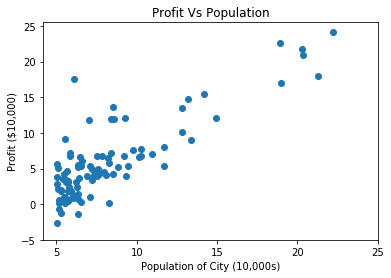

In [4]:
plt.figure(1)
plt.scatter(data[0], data[1])
plt.xticks(np.arange(5, 30, step=5))
plt.yticks(np.arange(-5, 30, step=5))
plt.xlabel('Population of City (10,000s)')
plt.ylabel('Profit ($10,000)')
plt.title('Profit Vs Population')
plt.show()

## Setting up input variables

In [ ]:
data_n = data.values
print(data_n)

In [ ]:
# Getting number of training examples (m)
m = data_n.shape[0]
print(m)

In [ ]:
x = np.append(np.ones((m, 1)), data_n[:, 0].reshape(m, 1), axis=1)
print(x)

In [ ]:
y = data_n[:, 1].reshape(m, 1)
print(y)

In [ ]:
theta = np.zeros((2, 1))
print(theta)

## Cost function and gradient descent

In [ ]:
def computeCost ( x, y, theta, m ):
    predicted_y = x.dot(theta)
    squared_error = (predicted_y - y) ** 2
    mean_squared_error = (1 / (2 * m)) * np.sum(squared_error)
    return mean_squared_error

In [ ]:
initial_cost = computeCost(x, y, theta, m)
print("initial_cost is: {}".format(initial_cost))

In [ ]:
def gradientDescent ( x, y, theta, m, alpha, num_iters ):
    print("\nPerforming gradient descent...")
    J_cost_history = []
    for i in range(num_iters):
        predictions = x.dot(theta)
        temp = np.dot(x.transpose(), (predictions - y))
        theta = theta - (alpha / m) * temp
        J_cost_history.append(computeCost(x, y, theta, m))
    return theta, J_cost_history


In [ ]:
alpha = 0.01
num_iterations = 1500
final_theta, J_cost_history = gradientDescent(x, y, theta, m, alpha, num_iterations)
print("\nfinal_theta is:\n", final_theta)
print("Linear equation would be: {} theta_0 + {} theta_1 ".format(
    final_theta[0][0],
    final_theta[1][0],
))

## Cost function plot

In [ ]:
plt.figure(2)
plt.plot(J_cost_history)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

In [ ]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit vs Population")

x_value=[x for x in range(25)]
y_value=[final_theta[0] + y*final_theta[1] for y in x_value]
plt.plot(x_value,y_value,color="r")

plt.show()

## Examples of predictions

In [ ]:
def predict (x, theta):
    theta_transpose = theta.transpose()
    #print (theta_transpose)
    #print (x)
    prediction = theta_transpose.dot(x)
    return prediction
    

print ("final theta is:\n{}".format(final_theta))
x = np.zeros((2,1))
x[0][0] = 1
x[1][0] = 3.5
print ("\nx is:\n{}".format(x))

    

In [ ]:
prediction = predict(x, final_theta)
print("For population = 35,000, we predict a profit of $"+str(prediction[0][0]* 10000))

In [ ]:
prediction2=predict(np.array([1,7]),final_theta)
print("For population = 70,000, we predict a profit of $"+ str(prediction2[0]*10000))

## Multi variable linear regression

In [ ]:
## Reading in training data
data2 = pd.read_csv('ex1data2.txt', header=None)
print(data2.head())

print(data2.describe())

## Create 2 subplot, 1 for each variable

In [ ]:
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")

axes[1].scatter(data2[1], data2[2], color='r')
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

plt.tight_layout()

## Feature Normalization

In [ ]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
print ("X2 is:\n{}".format(X2))


In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    print("mean is:\n{}".format(mean))
    std=np.std(X,axis=0)
    print("std is:\n{}".format(std))
    X_norm = (X - mean)/std
    return X_norm , mean , std

X2, mean_X2, std_X2 = featureNormalization(X2)


In [ ]:
X2 = np.append(np.ones((m2,1)),X2,axis=1)
print("X2 is:\n{}\n".format(X2[0:4]))

y2=data_n2[:,-1].reshape(m2,1)
print("y2 is:\n{}\n".format(y2[0:4]))

theta2=np.zeros((3,1))
print("theta2 is:\n{}\n".format(theta2))

In [ ]:
print(computeCost(X2, y2, theta2, m2))


In [ ]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,m2, 0.01,400)
print(theta2)

In [ ]:
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

In [ ]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

## Example

In [ ]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([1650,3]))[0]
print("x_sample is:\n{}".format(x_sample))
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of ${}".format(predict3[0]))